Quantum Prize Wheel Probabilities (Default Prizes):
Prize 0: 0.1237
Prize 1: 0.1212
Prize 2: 0.1236
Prize 3: 0.1263
Prize 4: 0.1298
Prize 5: 0.1272


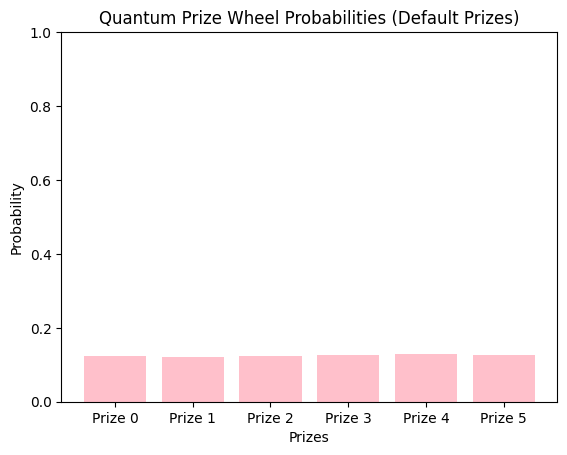


Quantum Prize Wheel Probabilities (Custom Prizes):
Dress: 0.1261
Car: 0.1239
House: 0.1259
Vacation: 0.1235
Gift Card: 0.1233
Nothing: 0.1298


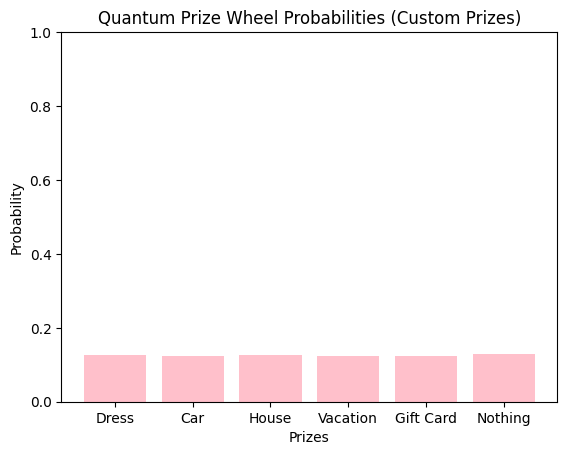

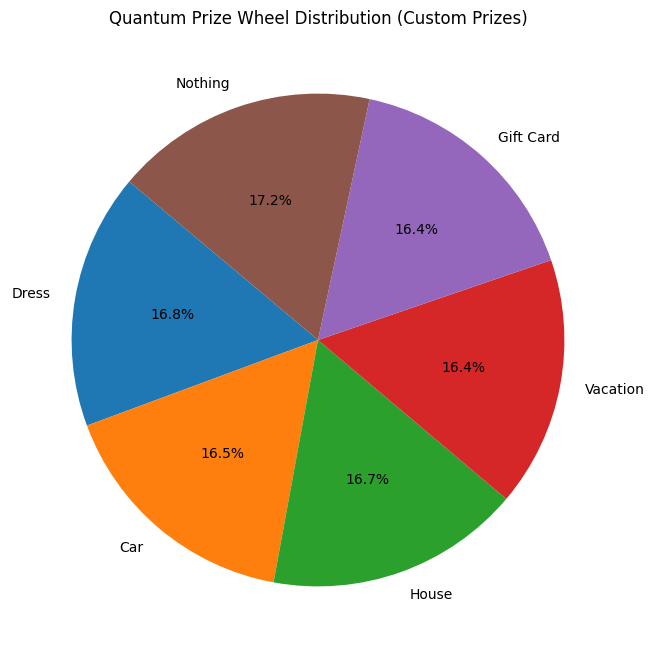


Classical Prize Wheel Probabilities:
Prize 0: 0.1684
Prize 1: 0.1692
Prize 2: 0.1680
Prize 3: 0.1673
Prize 4: 0.1650
Prize 5: 0.1621


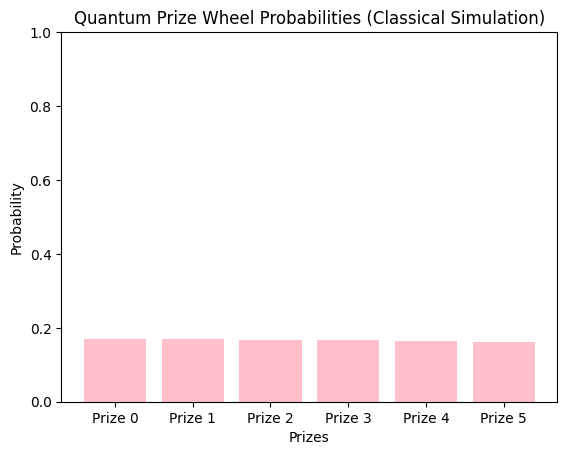

In [8]:
"""
I simulate a quantum prize wheel using quantum superposition to represent prize probabilities.
Each prize corresponds to a quantum state in superposition, illustrating quantum randomness.
This project demonstrates quantum measurement and probability distributions through an interactive model.
It also provides a comparison between quantum and classical randomness.
"""


!pip install qiskit qiskit-aer
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit.circuit import QuantumRegister
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt



def quantum_prize_wheel(num_prizes=6,num_spins=100):
    #Using superposition logic to simulate a prize wheel
    #Building the quantum circuit
    qr = QuantumRegister(int(np.ceil(np.log2(num_prizes))), 'q')
    cr = ClassicalRegister(int(np.ceil(np.log2(num_prizes))), 'c')
    qc = QuantumCircuit(qr, cr)

    #superposition for all prizes
    qc.h(qr)

    #Measurement
    qc.measure(qr, cr)

    #Simulating the circuit
    simulator = AerSimulator()
    # No explicit compile step needed in newer Qiskit versions for AerSimulator
    result = simulator.run(qc, shots=num_spins).result()
    counts = result.get_counts()

    #Calculating probabilities
    probabilities = {f'Prize {i}': counts.get(format(i, f'0{int(np.ceil(np.log2(num_prizes)))}b'), 0) / num_spins for i in range(num_prizes)}

    return probabilities

def plot_prize_probabilities(prize_probabilities, title_suffix=""):
    prizes = list(prize_probabilities.keys())
    probabilities = list(prize_probabilities.values())

    plt.bar(prizes, probabilities, color='pink')
    plt.xlabel('Prizes')
    plt.ylabel('Probability')
    plt.title(f'Quantum Prize Wheel Probabilities {title_suffix}')
    plt.ylim(0, 1)
    plt.show()

def classical_prize_wheel(num_prizes=6, num_spins=10000):
    counts = {f'Prize {i}': 0 for i in range(num_prizes)}
    for _ in range(num_spins):
        prize = np.random.randint(0, num_prizes)
        counts[f'Prize {prize}'] += 1
    probabilities = {prize: count / num_spins for prize, count in counts.items()}
    return probabilities

#Run the quantum prize wheel simulation and visualization
if __name__ == "__main__":
    num_spins = 10000

    # Quantum simulation with default prizes (0-5)
    num_prizes_default = 6
    prize_probabilities_quantum_default = quantum_prize_wheel(num_prizes_default, num_spins)
    print("Quantum Prize Wheel Probabilities (Default Prizes):")
    for prize, prob in prize_probabilities_quantum_default.items():
        print(f"{prize}: {prob:.4f}")
    plot_prize_probabilities(prize_probabilities_quantum_default, "(Default Prizes)")

    # Quantum simulation with custom named prizes
    prizes_names = ["Dress", "Car", "House", "Vacation", "Gift Card", "Nothing"]
    # Adjust num_prizes to match the length of prizes_names list
    prize_probabilities_quantum_custom = quantum_prize_wheel(len(prizes_names), num_spins)
    print("\nQuantum Prize Wheel Probabilities (Custom Prizes):")
    # Map the generated probabilities (Prize 0, Prize 1, etc.) to the custom names
    mapped_custom_probabilities = {prizes_names[i]: prob for i, (key, prob) in enumerate(prize_probabilities_quantum_custom.items())}
    for prize, prob in mapped_custom_probabilities.items():
        print(f"{prize}: {prob:.4f}")

    # Visualization for custom prizes
    plot_prize_probabilities(mapped_custom_probabilities, "(Custom Prizes)")

    # Create pie chart for custom prizes
    probabilities_list_custom = list(mapped_custom_probabilities.values())
    plt.figure(figsize=(8, 8))
    plt.pie(probabilities_list_custom, labels=prizes_names, autopct='%1.1f%%', startangle=140)
    plt.title('Quantum Prize Wheel Distribution (Custom Prizes)')
    plt.show()

    # Compare with classical simulation (using the same number of prizes as default quantum)
    classical_probabilities = classical_prize_wheel(num_prizes_default, num_spins)
    print("\nClassical Prize Wheel Probabilities:")
    for prize, prob in classical_probabilities.items():
        print(f"{prize}: {prob:.4f}")
    plot_prize_probabilities(classical_probabilities, "(Classical Simulation)")